In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
from geopandas.plotting import plot_polygon_collection
import tilemapbase
tilemapbase.init(create=True)
import folium
from folium.features import DivIcon
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns

Tokyo_grid = pd.read_csv('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/grid_data/SDDSWS5339/Tokyo_grid.csv')
Kyoto_grid = pd.read_csv('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/grid_data/QDDSWQ5235/Kyoto_grid.csv')


In [3]:
Tokyo_residents_max = Tokyo_grid['residents'].max()
Tokyo_residents_min = Tokyo_grid['residents'].min()
Kyoto_residents_max = Kyoto_grid['residents'].max()
Kyoto_residents_min = Kyoto_grid['residents'].min()

In [4]:
if (Tokyo_residents_max > Kyoto_residents_max):
    residents_max = Tokyo_residents_max
else:
    residents_max = Kyoto_residents_max

if (Tokyo_residents_min < Kyoto_residents_min):
    residents_min = Tokyo_residents_min
else:
    residents_min = Kyoto_residents_min

In [5]:
interval_values = np.linspace(residents_min, residents_max, 5)
interval_values
# interval_values = np.linspace(Tokyo_residents_min, Tokyo_residents_max, 6)
# interval_values

array([1.000000e+00, 8.177250e+03, 1.635350e+04, 2.452975e+04,
       3.270600e+04])

In [6]:
# palette = sns.color_palette(n_colors=5)
palette = sns.color_palette("Reds", 4)

hex_values = [mcolors.to_hex(color) for color in palette]

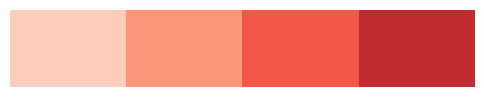

In [7]:
# palette = sns.color_palette("Reds", 5)



# 透過度（Alpha値）を0.8に設定
alpha_value = 0.9

# 各色に透過度を追加した新しいカラーパレットを作成
transparent_palette = [(r, g, b, alpha_value) for r, g, b in palette]

# カラーパレットをMatplotlibのimshowを使用して表示
fig, ax = plt.subplots(figsize=(6, 1))
ax.imshow([transparent_palette], aspect='auto', cmap='viridis')

# 不要な軸を非表示にする
ax.axis('off')

# グラフを表示
plt.show()

In [8]:
def find_interval(number, interval_values):
    """
    入力された数字がinterval_valuesのどの範囲に属するかを判定する関数

    Parameters:
    - number: 判定する数字
    - interval_values: 区間の配列

    Returns:
    - interval: 数字が属する区間（例: (0, 20)）
    """
    for i in range(len(interval_values) - 1):
        if interval_values[i] <= number <= interval_values[i + 1]:
            return i
    # 数字がどの範囲にも属さない場合
    return None

In [9]:
Tokyo_grid['color_num'] = Tokyo_grid['residents'].apply(lambda x: find_interval(x, interval_values))
Kyoto_grid['color_num'] = Kyoto_grid['residents'].apply(lambda x: find_interval(x, interval_values))

In [10]:
Tokyo_grid

Unnamed: 0       key      minx       miny      maxx       maxy   
0              0  53390000  139.0000  35.333333  139.0125  35.341667  \
1              1  53390001  139.0125  35.333333  139.0250  35.341667   
2              2  53390002  139.0250  35.333333  139.0375  35.341667   
3              3  53390003  139.0375  35.333333  139.0500  35.341667   
4              4  53390004  139.0500  35.333333  139.0625  35.341667   
...          ...       ...       ...        ...       ...        ...   
6295        6295  53397795  139.9375  35.991667  139.9500  36.000000   
6296        6296  53397796  139.9500  35.991667  139.9625  36.000000   
6297        6297  53397797  139.9625  35.991667  139.9750  36.000000   
6298        6298  53397798  139.9750  35.991667  139.9875  36.000000   
6299        6299  53397799  139.9875  35.991667  140.0000  36.000000   

      residents  color_num  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
6295      379.0        0.0  
6296      228.0        0.0  
6297       53.0        0.0  
6298      541.0        0.0  
6299      148.0        0.0  

[6300 rows x 8 columns]

In [79]:
map = folium.Map(location=[35.679165, 139.76875], zoom_start=14, tiles='openstreetmap')
# folium.TileLayer('stamentoner').add_to(map)
meth_list=[53394611, 52353680, 52354610, 52354642, 52354513, 52354548, 52353692, 52354519, 52353579]
place_list = ['Tokyo Staion', 'Kyoto Station', 'Nakagyo ward', 'Kyoto university', 'Arashiyama', 'Kinkaku-ji temple', 'Kiyomizu-dera temple', 'Nijo-jo castle', 'To-ji temple']
place_snwe = [[35.675, 139.7625, 35.683333333333, 139.775],
              [34.983333333333, 135.75, 34.99166666666, 135.7625],
              [35.008333333333, 135.75, 35.016666666667, 135.7625],
              [35.033333333333, 135.775, 35.041666666667, 135.7875],
              [35.008333333333, 135.6625, 35.016666666667, 135.675],
              [35.033333333333, 135.725, 35.041666666667, 135.7375],
              [34.991666666667, 135.775, 35, 135.7875],
              [35.008333333333, 135.7375, 35.01666666666, 135.75],
              [34.975, 135.7375, 34.983333333333, 135.75]]

for i in range(len(Tokyo_grid)):
    s = Tokyo_grid.miny[i]
    w = Tokyo_grid.minx[i]
    n = Tokyo_grid.maxy[i]
    e = Tokyo_grid.maxx[i]

    #枠線の追加
    if pd.isna(Tokyo_grid['color_num'][i]):  # もしくは df['num'].isna().iloc[i] でも可
        folium.Polygon(
            color = 'black',
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.8, # 透明度（1=不透明）
        ).add_to(map)
      #東京駅を可視化
    elif Tokyo_grid.key[i] == 53394611:
        folium.Polygon(
            color=hex_values[int(Tokyo_grid['color_num'][i])],
            fill_color=hex_values[int(Tokyo_grid['color_num'][i])],
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.8 # 透明度（1=不透明）
        ).add_to(map)

        folium.Polygon(
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            color="blue", # 線の色
            weight=5, # 線の太さ
        ).add_to(map)
    else:
        folium.Polygon(
            color='black',
            fill_color=hex_values[int(Tokyo_grid['color_num'][i])],
            # color = 'black',
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.8, # 透明度（1=不透明）
        ).add_to(map)



map

In [88]:
Kyoto_map = folium.Map(location=[35.01245, 135.74375], zoom_start=14, tiles='openstreetmap')
# folium.TileLayer('stamentoner').add_to(map)
meth_list=[53394611, 52353680, 52354610, 52354642, 52354513, 52354548, 52353692, 52354519, 52353579]
place_list = ['Tokyo Staion', 'Kyoto Station', 'Nakagyo ward', 'Kyoto university', 'Arashiyama', 'Kinkaku-ji temple', 'Kiyomizu-dera temple', 'Nijo-jo castle', 'To-ji temple']
place_snwe = [[35.675, 139.7625, 35.683333333333, 139.775],
              [34.983333333333, 135.75, 34.99166666666, 135.7625],
              [35.008333333333, 135.75, 35.016666666667, 135.7625],
              [35.033333333333, 135.775, 35.041666666667, 135.7875],
              [35.008333333333, 135.6625, 35.016666666667, 135.675],
              [35.033333333333, 135.725, 35.041666666667, 135.7375],
              [34.991666666667, 135.775, 35, 135.7875],
              [35.008333333333, 135.7375, 35.01666666666, 135.75],
              [34.975, 135.7375, 34.983333333333, 135.75]]


for i in range(len(Kyoto_grid)):
    s = Kyoto_grid.miny[i]
    w = Kyoto_grid.minx[i]
    n = Kyoto_grid.maxy[i]
    e = Kyoto_grid.maxx[i]
    

    
    #枠線の追加
    if pd.isna(Kyoto_grid['color_num'][i]):  # もしくは df['num'].isna().iloc[i] でも可
        folium.Polygon(
            color = 'black',
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.8, # 透明度（1=不透明）
        ).add_to(Kyoto_map)
      #東京駅を可視化
    elif Kyoto_grid.key[i] == 52353680:
        folium.Polygon(
           # fill_color=hex_values[int(Kyoto_grid['color_num'][i])],
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.8 # 透明度（1=不透明）
        ).add_to(Kyoto_map)
        folium.Polygon(
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            color="blue", # 線の色
            weight=10, # 線の太さ
        ).add_to(Kyoto_map)
    elif Kyoto_grid.key[i] in [52354610, 52354642]:
        folium.Polygon(
           # fill_color=hex_values[int(Kyoto_grid['color_num'][i])],
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.8 # 透明度（1=不透明）
        ).add_to(Kyoto_map)
        folium.Polygon(
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            color="yellow", # 線の色
            weight=10, # 線の太さ
        ).add_to(Kyoto_map)
    elif Kyoto_grid.key[i] in [52354513, 52354548, 52353692, 52354519, 52353579]:
        folium.Polygon(
           # fill_color=hex_values[int(Kyoto_grid['color_num'][i])],
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.8 # 透明度（1=不透明）
        ).add_to(Kyoto_map)
        folium.Polygon(
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            color="green", # 線の色
            weight=10, # 線の太さ
        ).add_to(Kyoto_map)
    else:
        folium.Polygon(
            color='black',
           # fill_color=hex_values[int(Kyoto_grid['color_num'][i])],
            # color = 'black',
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.8, # 透明度（1=不透明）
        ).add_to(Kyoto_map)



Kyoto_map